In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

/kaggle/input/housesalesprediction/kc_house_data.csv


In [2]:
df= pd.read_csv('/kaggle/input/housesalesprediction/kc_house_data.csv')
p=df.copy()
df

id             date     price  bedrooms  bathrooms  \
0      7129300520  20141013T000000  221900.0         3       1.00   
1      6414100192  20141209T000000  538000.0         3       2.25   
2      5631500400  20150225T000000  180000.0         2       1.00   
3      2487200875  20141209T000000  604000.0         4       3.00   
4      1954400510  20150218T000000  510000.0         3       2.00   
...           ...              ...       ...       ...        ...   
21608   263000018  20140521T000000  360000.0         3       2.50   
21609  6600060120  20150223T000000  400000.0         4       2.50   
21610  1523300141  20140623T000000  402101.0         2       0.75   
21611   291310100  20150116T000000  400000.0         3       2.50   
21612  1523300157  20141015T000000  325000.0         2       0.75   

       sqft_living  sqft_lot  floors  waterfront  view  condition  grade  \
0             1180      5650     1.0           0     0          3      7   
1             2570      7242     2.0           0     0          3      7   
2              770     10000     1.0           0     0          3      6   
3             1960      5000     1.0           0     0          5      7   
4             1680      8080     1.0           0     0          3      8   
...            ...       ...     ...         ...   ...        ...    ...   
21608         1530      1131     3.0           0     0          3      8   
21609         2310      5813     2.0           0     0          3      8   
21610         1020      1350     2.0           0     0          3      7   
21611         1600      2388     2.0           0     0          3      8   
21612         1020      1076     2.0           0     0          3      7   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
0            1180              0      1955             0    98178  47.5112   
1            2170            400      1951          1991    98125  47.7210   
2             770              0      1933             0    98028  47.7379   
3            1050            910      1965             0    98136  47.5208   
4            1680              0      1987             0    98074  47.6168   
...           ...            ...       ...           ...      ...      ...   
21608        1530              0      2009             0    98103  47.6993   
21609        2310              0      2014             0    98146  47.5107   
21610        1020              0      2009             0    98144  47.5944   
21611        1600              0      2004             0    98027  47.5345   
21612        1020              0      2008             0    98144  47.5941   

          long  sqft_living15  sqft_lot15  
0     -122.257           1340        5650  
1     -122.319           1690        7639  
2     -122.233           2720        8062  
3     -122.393           1360        5000  
4     -122.045           1800        7503  
...        ...            ...         ...  
21608 -122.346           1530        1509  
21609 -122.362           1830        7200  
21610 -122.299           1020        2007  
21611 -122.069           1410        1287  
21612 -122.299           1020        1357  

[21613 rows x 21 columns]

In [3]:
# df.drop(columns={'id', 'date'},axis=1).hist(color='orange',figsize=(15,15));

In [4]:
p= p.drop(columns={'id', 'date'},axis=1)

In [5]:
p.describe()

price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  2.161300e+04   
mean   5.400881e+05      3.370842      2.114757   2079.899736  1.510697e+04   
std    3.671272e+05      0.930062      0.770163    918.440897  4.142051e+04   
min    7.500000e+04      0.000000      0.000000    290.000000  5.200000e+02   
25%    3.219500e+05      3.000000      1.750000   1427.000000  5.040000e+03   
50%    4.500000e+05      3.000000      2.250000   1910.000000  7.618000e+03   
75%    6.450000e+05      4.000000      2.500000   2550.000000  1.068800e+04   
max    7.700000e+06     33.000000      8.000000  13540.000000  1.651359e+06   

             floors    waterfront          view     condition         grade  \
count  21613.000000  21613.000000  21613.000000  21613.000000  21613.000000   
mean       1.494309      0.007542      0.234303      3.409430      7.656873   
std        0.539989      0.086517      0.766318      0.650743      1.175459   
min        1.000000      0.000000      0.000000      1.000000      1.000000   
25%        1.000000      0.000000      0.000000      3.000000      7.000000   
50%        1.500000      0.000000      0.000000      3.000000      7.000000   
75%        2.000000      0.000000      0.000000      4.000000      8.000000   
max        3.500000      1.000000      4.000000      5.000000     13.000000   

         sqft_above  sqft_basement      yr_built  yr_renovated       zipcode  \
count  21613.000000   21613.000000  21613.000000  21613.000000  21613.000000   
mean    1788.390691     291.509045   1971.005136     84.402258  98077.939805   
std      828.090978     442.575043     29.373411    401.679240     53.505026   
min      290.000000       0.000000   1900.000000      0.000000  98001.000000   
25%     1190.000000       0.000000   1951.000000      0.000000  98033.000000   
50%     1560.000000       0.000000   1975.000000      0.000000  98065.000000   
75%     2210.000000     560.000000   1997.000000      0.000000  98118.000000   
max     9410.000000    4820.000000   2015.000000   2015.000000  98199.000000   

                lat          long  sqft_living15     sqft_lot15  
count  21613.000000  21613.000000   21613.000000   21613.000000  
mean      47.560053   -122.213896    1986.552492   12768.455652  
std        0.138564      0.140828     685.391304   27304.179631  
min       47.155900   -122.519000     399.000000     651.000000  
25%       47.471000   -122.328000    1490.000000    5100.000000  
50%       47.571800   -122.230000    1840.000000    7620.000000  
75%       47.678000   -122.125000    2360.000000   10083.000000  
max       47.777600   -121.315000    6210.000000  871200.000000

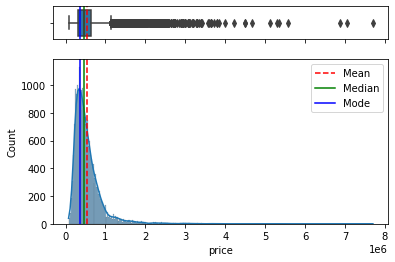

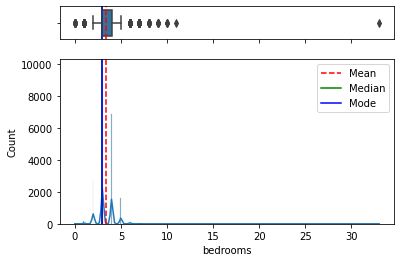

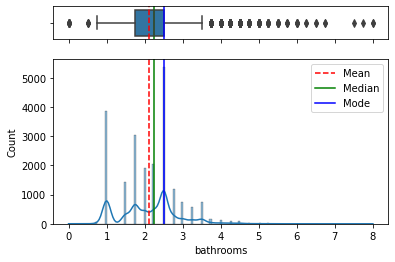

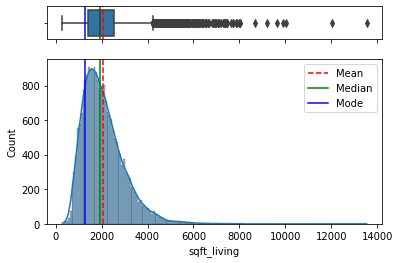

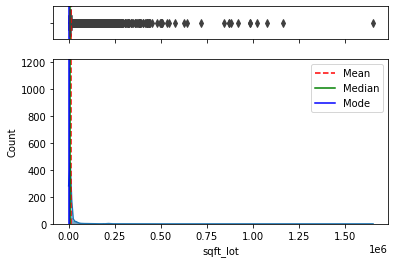

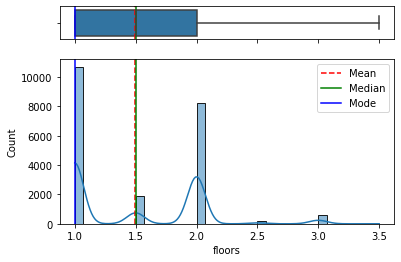

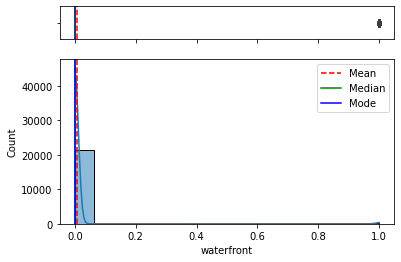

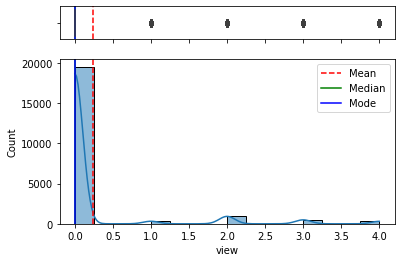

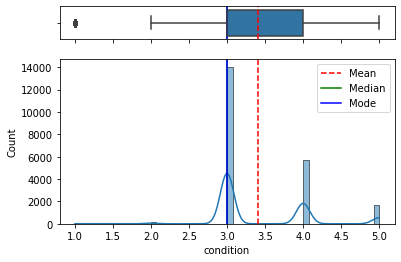

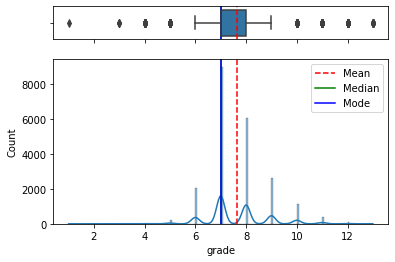

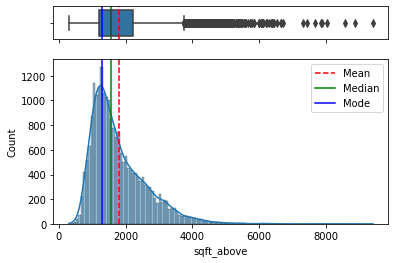

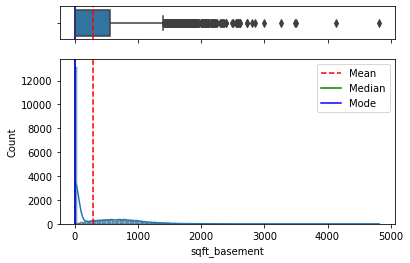

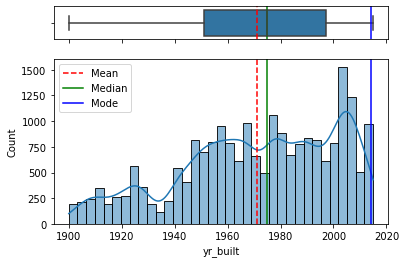

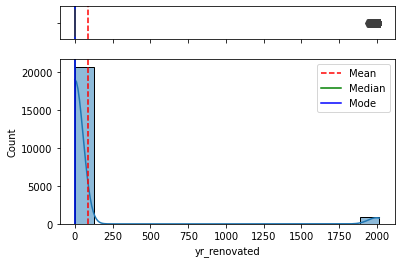

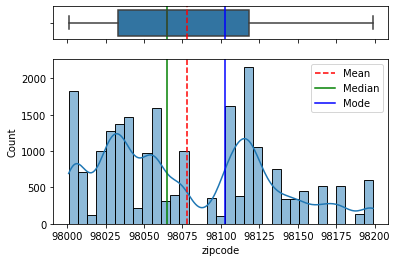

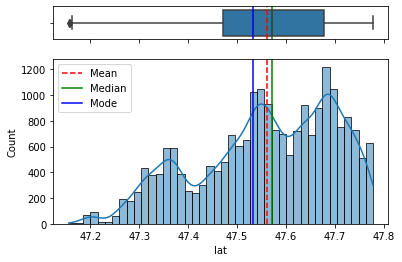

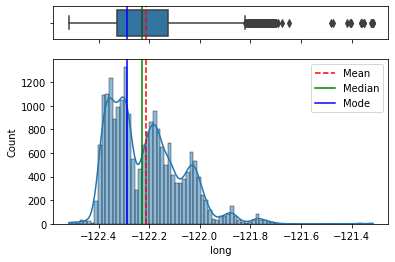

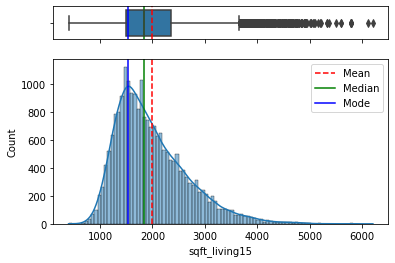

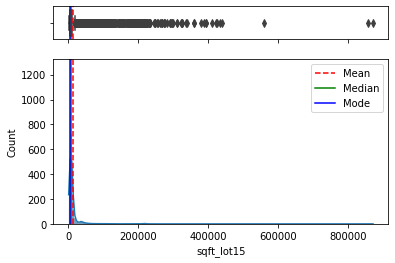

In [6]:
j=1
for i in p:
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
    mean=df[i].mean()
    median=df[i].median()
    mode=df[i].mode().values[0]

    sns.boxplot(data=df, x=i, ax=ax_box)
    ax_box.axvline(mean, color='r', linestyle='--')
    ax_box.axvline(median, color='g', linestyle='-')
    ax_box.axvline(mode, color='b', linestyle='-')

    sns.histplot(data=df, x=i, ax=ax_hist, kde=True)
    ax_hist.axvline(mean, color='r', linestyle='--', label="Mean")
    ax_hist.axvline(median, color='g', linestyle='-', label="Median")
    ax_hist.axvline(mode, color='b', linestyle='-', label="Mode")

    ax_hist.legend()

    ax_box.set(xlabel='')
    plt.show()

In [7]:
'''import plotly.express as px
### creating a histogram using ploty

import plotly.express as px
fig = px.histogram(df, x="price")
fig.show()

### Creating multiple histogram   #####
j=1
for i in p:
    plt.subplot(1,19,j)
    fig = px.histogram(p, x=i,
                       title=i,
                       opacity=0.8,
                       #log_y=True, # represent bars with log scale
                       marginal="box", # or violin, rug
                       color_discrete_sequence=['blue'] # color of histogram bars
                       )
    fig.show()
    j=j+1
''';

Log Histogram 


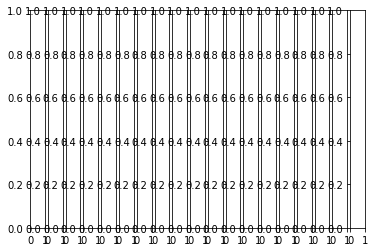

In [8]:
import plotly.express as px
print('Log Histogram ')

j=1
for i in p:
    plt.subplot(1,19,j)
    fig = px.histogram(p, x=i,
                       title=i,
                       opacity=0.8,
                       log_y=True, # represent bars with log scale
                       # marginal="box", # or violin, rug
                       marginal = 'violin',
                       color_discrete_sequence=['#A56CC1'] # color of histogram bars
                       )
    fig.show()
    j=j+1


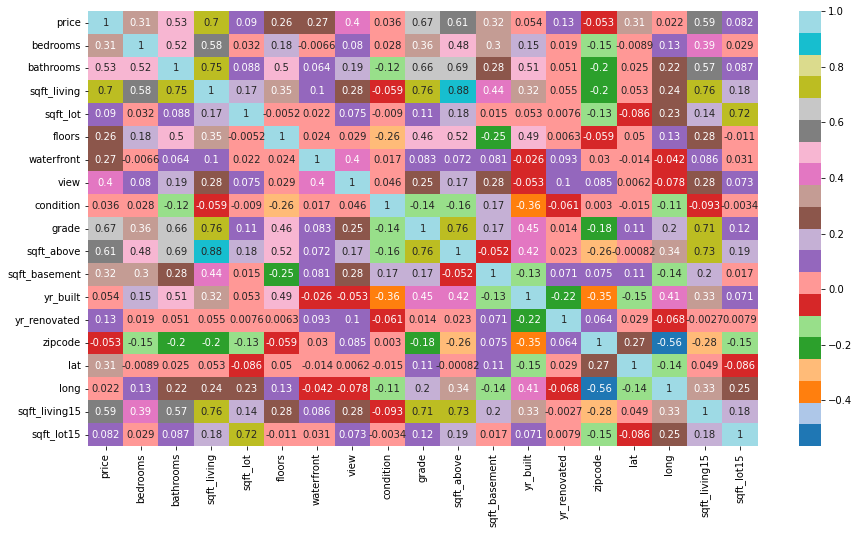

In [9]:
plt.figure(figsize=(15,8))
sns.heatmap(p.corr(), annot=True, cmap = "tab20");

# Heat Map of location and price
* Generally price of property depends on locations 

* **King County** is located in the **U.S. state of Washington**. The population was 2,269,675 in the 2020 census, making it the most populous county in Washington, and the 12th-most populous in the United States. The county seat is Seattle, also the state's most populous city. 
* however this dataset is 5 years old

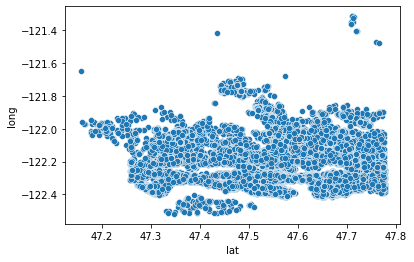

In [10]:
sns.scatterplot(x='lat', y='long', data=p);

In [11]:
price_list=p.price.values.tolist()


In [12]:
!pip install folium

In [13]:
import folium
from folium.plugins import HeatMap


In [14]:
def generateBaseMap(default_location=[47.5112,-122.257], default_zoom_start=12):
    base_map = folium.Map(location=default_location, zoom_start=default_zoom_start)
    return base_map

In [15]:
basemap=generateBaseMap()

In [16]:
p.head(3)

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900.0         3       1.00         1180      5650     1.0           0   
1  538000.0         3       2.25         2570      7242     2.0           0   
2  180000.0         2       1.00          770     10000     1.0           0   

   view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0     0          3      7        1180              0      1955             0   
1     0          3      7        2170            400      1951          1991   
2     0          3      6         770              0      1933             0   

   zipcode      lat     long  sqft_living15  sqft_lot15  
0    98178  47.5112 -122.257           1340        5650  
1    98125  47.7210 -122.319           1690        7639  
2    98028  47.7379 -122.233           2720        8062

In [17]:
HeatMap(p[['lat','long','price']].values.tolist(),zoom=20,radius=15).add_to(basemap)

In [18]:
basemap

In [19]:
####### heat map with price < mean ###########
'''

HeatMap(p[['lat','long'],p['price']<p.price.mean()].values.tolist(),zoom=20,radius=15).add_to(basemap)
basemap
# p.price.mean()
''';

In [20]:
####### heat map with price > mean ###########

In [21]:
### Heat map with zip code ####

HeatMap(p[['lat','long','zipcode']].values.tolist(),zoom=20,radius=15).add_to(basemap)
basemap

# Deep Learning

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import torch
import torch.nn as nn
import torch.nn.functional as F

### Preprocessing

In [23]:
data = df.drop('id', axis=1)
data['year'] = data['date'].apply(lambda x: x[0:4])
data['month'] = data['date'].apply(lambda x: x[4:6])
#data['day'] = data['date'].apply(lambda x: x[6:8])

data = data.drop('date', axis=1)
print(len(data['zipcode'].unique()),'\n')
print()
data.head()

70 




price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900.0         3       1.00         1180      5650     1.0           0   
1  538000.0         3       2.25         2570      7242     2.0           0   
2  180000.0         2       1.00          770     10000     1.0           0   
3  604000.0         4       3.00         1960      5000     1.0           0   
4  510000.0         3       2.00         1680      8080     1.0           0   

   view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0     0          3      7        1180              0      1955             0   
1     0          3      7        2170            400      1951          1991   
2     0          3      6         770              0      1933             0   
3     0          5      7        1050            910      1965             0   
4     0          3      8        1680              0      1987             0   

   zipcode      lat     long  sqft_living15  sqft_lot15  year month  
0    98178  47.5112 -122.257           1340        5650  2014    10  
1    98125  47.7210 -122.319           1690        7639  2014    12  
2    98028  47.7379 -122.233           2720        8062  2015    02  
3    98136  47.5208 -122.393           1360        5000  2014    12  
4    98074  47.6168 -122.045           1800        7503  2015    02

As there are only 70 unique zipcode we can perform one hot encode on zipcode
* We are performing zipcode encoding because we don't want machine to think high or lower value of zipcode influence the result

In [24]:
def onehot_encode(df, column, prefix):
    df = df.copy()
    dummies = pd.get_dummies(df[column], prefix=prefix)
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(column, axis=1)
    return df

In [25]:
data = onehot_encode(data, 'zipcode', 'zip')

### What are query?
> The query function allows for applying filtering conditions as a string. It provides more flexibility than many other techniques.

[Further Reading](https://towardsdatascience.com/10-examples-that-will-make-you-use-pandas-query-function-more-often-a8fb3e9361cb)

In [26]:
data.query("yr_renovated != 0")

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
1       538000.0         3       2.25         2570      7242     2.0   
35      696000.0         3       2.50         2300      3060     1.5   
95      905000.0         4       2.50         3300     10250     1.0   
103    1088000.0         3       2.50         2920      8113     2.0   
115     740500.0         3       3.50         4380      6350     2.0   
...          ...       ...        ...          ...       ...     ...   
19622  1150000.0         3       1.75         1760      6788     2.0   
20057   434900.0         3       2.00         1520      5040     2.0   
20444   500012.0         4       2.50         2400      9612     1.0   
20447   356999.0         3       1.50         1010      1546     2.0   
20962   110000.0         2       1.00          828      4524     1.0   

       waterfront  view  condition  grade  sqft_above  sqft_basement  \
1               0     0          3      7        2170            400   
35              0     0          3      8        1510            790   
95              0     0          3      7        2390            910   
103             0     0          3      8        2920              0   
115             0     0          3      8        2780           1600   
...           ...   ...        ...    ...         ...            ...   
19622           1     4          3      7        1760              0   
20057           0     0          3      7        1520              0   
20444           0     0          3      8        1230           1170   
20447           0     0          3      8        1010              0   
20962           0     0          3      6         828              0   

       yr_built  yr_renovated      lat     long  sqft_living15  sqft_lot15  \
1          1951          1991  47.7210 -122.319           1690        7639   
35         1930          2002  47.6827 -122.310           1590        3264   
95         1946          1991  47.5873 -122.249           1950        6045   
103        1950          2010  47.5814 -122.196           2370        8113   
115        1900          1999  47.6981 -122.368           1830        6350   
...         ...           ...      ...      ...            ...         ...   
19622      1940          1960  47.7336 -122.284           1630        7588   
20057      1977          2006  47.7770 -122.362           1860        8710   
20444      1962          2009  47.4799 -122.127           2430        5539   
20447      1971          2014  47.5998 -122.311           1010        1517   
20962      1968          2007  47.2655 -122.244            828        5402   

       year month  zip_98001  zip_98002  zip_98003  zip_98004  zip_98005  \
1      2014    12          0          0          0          0          0   
35     2014    06          0          0          0          0          0   
95     2014    09          0          0          0          0          0   
103    2014    10          0          0          0          1          0   
115    2014    11          0          0          0          0          0   
...     ...   ...        ...        ...        ...        ...        ...   
19622  2015    01          0          0          0          0          0   
20057  2014    09          0          0          0          0          0   
20444  2015    02          0          0          0          0          0   
20447  2015    02          0          0          0          0          0   
20962  2015    03          1          0          0          0          0   

       zip_98006  zip_98007  zip_98008  zip_98010  zip_98011  zip_98014  \
1              0          0          0          0          0          0   
35             0          0          0          0          0          0   
95             0          0          0          0          0          0   
103            0          0          0          0          0          0   
115            0          0          0          0       

yr_renovated have 914 0 values so we are gonna drop it

In [27]:
data = data.drop('yr_renovated', axis=1)

In [28]:
data

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0      221900.0         3       1.00         1180      5650     1.0   
1      538000.0         3       2.25         2570      7242     2.0   
2      180000.0         2       1.00          770     10000     1.0   
3      604000.0         4       3.00         1960      5000     1.0   
4      510000.0         3       2.00         1680      8080     1.0   
...         ...       ...        ...          ...       ...     ...   
21608  360000.0         3       2.50         1530      1131     3.0   
21609  400000.0         4       2.50         2310      5813     2.0   
21610  402101.0         2       0.75         1020      1350     2.0   
21611  400000.0         3       2.50         1600      2388     2.0   
21612  325000.0         2       0.75         1020      1076     2.0   

       waterfront  view  condition  grade  sqft_above  sqft_basement  \
0               0     0          3      7        1180              0   
1               0     0          3      7        2170            400   
2               0     0          3      6         770              0   
3               0     0          5      7        1050            910   
4               0     0          3      8        1680              0   
...           ...   ...        ...    ...         ...            ...   
21608           0     0          3      8        1530              0   
21609           0     0          3      8        2310              0   
21610           0     0          3      7        1020              0   
21611           0     0          3      8        1600              0   
21612           0     0          3      7        1020              0   

       yr_built      lat     long  sqft_living15  sqft_lot15  year month  \
0          1955  47.5112 -122.257           1340        5650  2014    10   
1          1951  47.7210 -122.319           1690        7639  2014    12   
2          1933  47.7379 -122.233           2720        8062  2015    02   
3          1965  47.5208 -122.393           1360        5000  2014    12   
4          1987  47.6168 -122.045           1800        7503  2015    02   
...         ...      ...      ...            ...         ...   ...   ...   
21608      2009  47.6993 -122.346           1530        1509  2014    05   
21609      2014  47.5107 -122.362           1830        7200  2015    02   
21610      2009  47.5944 -122.299           1020        2007  2014    06   
21611      2004  47.5345 -122.069           1410        1287  2015    01   
21612      2008  47.5941 -122.299           1020        1357  2014    10   

       zip_98001  zip_98002  zip_98003  zip_98004  zip_98005  zip_98006  \
0              0          0          0          0          0          0   
1              0          0          0          0          0          0   
2              0          0          0          0          0          0   
3              0          0          0          0          0          0   
4              0          0          0          0          0          0   
...          ...        ...        ...        ...        ...        ...   
21608          0          0          0          0          0          0   
21609          0          0          0          0          0          0   
21610          0          0          0          0          0          0   
21611          0          0          0          0          0          0   
21612          0          0          0          0          0          0   

       zip_98007  zip_98008  zip_98010  zip_98011  zip_98014  zip_98019  \
0              0          0          0          0          0          0   
1              0          0          0          0          0          0   
2              0          0          0          0          0          0   
3              0          0          0          0          0          0   
4              0          0          0          0          0          0   
...          ...        ... 

## Splitting and Scaling

In [29]:
y = data['price'].copy()
X = data.drop('price', axis=1).copy()

In [30]:
scaler = StandardScaler()

X = scaler.fit_transform(X)

In [31]:
tf_X_train, tf_X_test, tf_y_train, tf_y_test = train_test_split(X, y, train_size=0.7, random_state=1)

# Training With PyTorch

In [32]:
%%time
class Net(nn.Module):   ## We need to create a class for nn and gonna inheriant from neural network.module
    
    def __init__(self):
        super(Net, self).__init__()
        self.layer1 = nn.Linear(88, 64)  ## Just like hidden layer
        self.layer2 = nn.Linear(64, 64)  ## 2nd hidden layer
        self.out = nn.Linear(64, 1)
    
    def forward(self, x):
        x = F.relu(self.layer1(x))   ## Activation function relu
        x = F.relu(self.layer2(x))   ## Activation function relu
        x = self.out(x)
        return x

net = Net()

CPU times: user 2.1 ms, sys: 1.22 ms, total: 3.32 ms
Wall time: 25.4 ms


In [33]:
list(net.parameters())

[Parameter containing:
 tensor([[ 0.0111, -0.0639, -0.0848,  ...,  0.0531, -0.0091,  0.0455],
         [ 0.0521, -0.0120, -0.0671,  ...,  0.0156,  0.0432,  0.0969],
         [-0.0600, -0.0524,  0.0439,  ..., -0.0027, -0.0410,  0.0318],
         ...,
         [-0.0652, -0.1046,  0.0685,  ..., -0.0261,  0.0900,  0.0928],
         [-0.0983,  0.0655,  0.0775,  ..., -0.0128, -0.0076, -0.0232],
         [ 0.0275,  0.0355, -0.0542,  ...,  0.0260,  0.0458, -0.1054]],
        requires_grad=True),
 Parameter containing:
 tensor([-0.0728, -0.0547,  0.0785, -0.0564, -0.0525, -0.0362, -0.0778,  0.0797,
          0.0910,  0.0031,  0.0071, -0.0370,  0.0291,  0.0901,  0.0675, -0.0381,
         -0.0864,  0.0852, -0.0033,  0.0202,  0.1058, -0.0245,  0.1018,  0.0791,
          0.0679,  0.0804,  0.0167, -0.0709, -0.0190, -0.1037, -0.1021, -0.0300,
          0.0068, -0.1021,  0.0784, -0.0708, -0.0085, -0.0773,  0.0859, -0.0778,
          0.0178, -0.0130,  0.0072,  0.0484, -0.0454, -0.0601,  0.0617,  0.0743

In [34]:
for i in range(len(list(net.parameters()))):
    print(list(net.parameters())[i].shape)

torch.Size([64, 88])
torch.Size([64])
torch.Size([64, 64])
torch.Size([64])
torch.Size([1, 64])
torch.Size([1])


In [35]:
torch_X_train = torch.tensor(tf_X_train).type(torch.float32)
torch_y_train = torch.tensor(np.array(tf_y_train)).type(torch.float32)

torch_X_test = torch.tensor(tf_X_test).type(torch.float32)
torch_y_test = torch.tensor(np.array(tf_y_test)).type(torch.float32)

In [36]:
optimizer = torch.optim.Adam(net.parameters(), lr=0.01)
criterion = nn.MSELoss()

In [37]:
%%time
for x, target in zip(torch_X_train, torch_y_train):
    optimizer.zero_grad()
    output = net(x)
    loss = criterion(output, target)
    loss.backward()
    optimizer.step()

/opt/conda/lib/python3.7/site-packages/torch/nn/modules/loss.py:446: UserWarning:

Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.



CPU times: user 19 s, sys: 21.6 ms, total: 19.1 s
Wall time: 19.1 s


In [38]:
%%time
total_loss = 0

for x, target in zip(torch_X_test, torch_y_test):
    output = net(x)
    loss = criterion(output, target)
    total_loss += loss
    
avg_loss = total_loss / len(torch_X_test)

CPU times: user 1.51 s, sys: 104 ms, total: 1.62 s
Wall time: 1.62 s


In [39]:
torch_rmse = torch.sqrt(avg_loss).detach().numpy()

# Results

In [40]:
print("   PyTorch RMSE 1st parameter:", torch_rmse)
# print("   PyTorch RMSE 2nd Parameter:", torch_rmse2)

   PyTorch RMSE 1st parameter: 209464.56


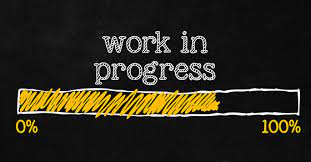

### Please upvote if u found this helpful